# Análisis Exploratorio de Datos - Retail Data

Este notebook contiene un análisis exploratorio del dataset de retail. Vamos a:
- Explorar la estructura de los datos
- Limpiar y preparar los datos
- Realizar análisis estadístico
- Crear visualizaciones
- Identificar patrones y oportunidades de análisis

## 1. Importación de Librerías

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 2. Carga de Datos

In [2]:
# Este comando conecta colab con drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Hacemos la conexion con la plantilla de datos a trabajar
path = "/content/drive/MyDrive/ColabTest/Clase Profe/Marchine Learning/Core/BD/retail_data.csv"
df = pd.read_csv(path)

## 3. Información General del Dataset

In [4]:
# Información sobre tipos de datos
print("Información del dataset:")
df.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302010 entries, 0 to 302009
Data columns (total 30 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Transaction_ID    301677 non-null  float64
 1   Customer_ID       301702 non-null  float64
 2   Name              301628 non-null  object 
 3   Email             301663 non-null  object 
 4   Phone             301648 non-null  float64
 5   Address           301695 non-null  object 
 6   City              301762 non-null  object 
 7   State             301729 non-null  object 
 8   Zipcode           301670 non-null  float64
 9   Country           301739 non-null  object 
 10  Age               301837 non-null  float64
 11  Gender            301693 non-null  object 
 12  Income            301720 non-null  object 
 13  Customer_Segment  301795 non-null  object 
 14  Date              301651 non-null  object 
 15  Year              301660 non-null  float64


In [5]:
# Nombres de las columnas
print("Columnas del dataset:")
print(df.columns.tolist())

Columnas del dataset:
['Transaction_ID', 'Customer_ID', 'Name', 'Email', 'Phone', 'Address', 'City', 'State', 'Zipcode', 'Country', 'Age', 'Gender', 'Income', 'Customer_Segment', 'Date', 'Year', 'Month', 'Time', 'Total_Purchases', 'Amount', 'Total_Amount', 'Product_Category', 'Product_Brand', 'Product_Type', 'Feedback', 'Shipping_Method', 'Payment_Method', 'Order_Status', 'Ratings', 'products']


In [6]:
# Revisamos el dataFrame
df

,Transaction_ID,Customer_ID,Name,Email,Phone,Address,City,State,Zipcode,Country,Age,Gender,Income,Customer_Segment,Date,Year,Month,Time,Total_Purchases,Amount,Total_Amount,Product_Category,Product_Brand,Product_Type,Feedback,Shipping_Method,Payment_Method,Order_Status,Ratings,products
0,8691788.0,37249.0,Michelle Harrington,Ebony39@gmail.com,1.414787e+09,3959 Amanda Burgs,Dortmund,Berlin,77985.0,Germany,21.0,Male,Low,Regular,9/18/2023,2023.0,September,22:03:55,3.0,108.028757,324.086270,Clothing,Nike,Shorts,Excellent,Same-Day,Debit Card,Shipped,5.0,Cycling shorts
1,2174773.0,69749.0,Kelsey Hill,Mark36@gmail.com,6.852900e+09,82072 Dawn Centers,Nottingham,England,99071.0,UK,19.0,Female,Low,Premium,12/31/2023,2023.0,December,8:42:04,2.0,403.353907,806.707815,Electronics,Samsung,Tablet,Excellent,Standard,Credit Card,Processing,4.0,Lenovo Tab
2,6679610.0,30192.0,Scott Jensen,Shane85@gmail.com,8.362160e+09,4133 Young Canyon,Geelong,New South Wales,75929.0,Australia,48.0,Male,Low,Regular,4/26/2023,2023.0,April,4:06:29,3.0,354.477600,1063.432799,Books,Penguin Books,Children's,Average,Same-Day,Credit Card,Processing,2.0,Sports equipment
3,7232460.0,62101.0,Joseph Miller,Mary34@gmail.com,2.776752e+09,8148 Thomas Creek Suite 100,Edmonton,Ontario,88420.0,Canada,56.0,Male,High,Premium,05-08-23,2023.0,May,14:55:17,7.0,352.407717,2466.854021,Home Decor,Home Depot,Tools,Excellent,Standard,PayPal,Processing,4.0,Utility knife
4,4983775.0,27901.0,Debra Coleman,Charles30@gmail.com,9.098268e+09,5813 Lori Ports Suite 269,Bristol,England,48704.0,UK,22.0,Male,Low,Premium,01-10-24,2024.0,January,16:54:07,2.0,124.276524,248.553049,Grocery,Nestle,Chocolate,Bad,Standard,Cash,Shipped,1.0,Chocolate cookies
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302005,4246475.0,12104.0,Meagan Ellis,Courtney60@gmail.com,7.466354e+09,389 Todd Path Apt. 159,Townsville,New South Wales,4567.0,Australia,31.0,Male,Medium,Regular,1/20/2024,2024.0,January,23:40:29,5.0,194.792597,973.962984,Books,Penguin Books,Fiction,Bad,Same-Day,Cash,Processing,1.0,Historical fiction
302006,1197603.0,69772.0,Mathew Beck,Jennifer71@gmail.com,5.754305e+09,52809 Mark Forges,Hanover,Berlin,16852.0,Germany,35.0,Female,Low,New,12/28/2023,2023.0,December,2:55:45,1.0,285.137301,285.137301,Electronics,Apple,Laptop,Excellent,Same-Day,Cash,Processing,5.0,LG Gram
302007,7743242.0,28449.0,Daniel Lee,Christopher100@gmail.com,9.382530e+09,407 Aaron Crossing Suite 495,Brighton,England,88038.0,UK,41.0,Male,Low,Premium,2/27/2024,2024.0,February,2:43:49,3.0,60.701761,182.105285,Clothing,Adidas,Jacket,Average,Express,Cash,Shipped,2.0,Parka
302008,9301950.0,45477.0,Patrick Wilson,Rebecca65@gmail.com,9.373222e+09,3204 Baird Port,Halifax,Ontario,67608.0,Canada,41.0,Male,Medium,New,09-03-23,2023.0,September,11:20:31,1.0,120.834784,120.834784,Home Decor,IKEA,Furniture,Good,Standard,Cash,Shipped,4.0,TV stand


## 4. Limpieza de Nombres de Columnas

In [7]:
# Estandarizar nombres de columnas
df.columns = df.columns.str.lower().str.replace(" ", "_")

print("Nombres de columnas actualizados:")
print(df.columns.tolist())

Nombres de columnas actualizados:
['transaction_id', 'customer_id', 'name', 'email', 'phone', 'address', 'city', 'state', 'zipcode', 'country', 'age', 'gender', 'income', 'customer_segment', 'date', 'year', 'month', 'time', 'total_purchases', 'amount', 'total_amount', 'product_category', 'product_brand', 'product_type', 'feedback', 'shipping_method', 'payment_method', 'order_status', 'ratings', 'products']


## 5. Análisis de Valores Nulos

In [8]:
# Identificar si existen valores nulos
print("Valores nulos antes de la limpieza:")
print(df.isnull().sum())

Valores nulos antes de la limpieza:
transaction_id      333
customer_id         308
name                382
email               347
phone               362
address             315
city                248
state               281
zipcode             340
country             271
age                 173
gender              317
income              290
customer_segment    215
date                359
year                350
month               273
time                350
total_purchases     361
amount              357
total_amount        350
product_category    283
product_brand       281
product_type          0
feedback            184
shipping_method     337
payment_method      297
order_status        235
ratings             184
products              0
dtype: int64


## 6. Análisis de Duplicados

In [9]:
# Revisar duplicados
df.duplicated().sum()

np.int64(4)

## 7. Análisis de Espacios Vacíos y Valores Inconsistentes

In [10]:
# Verificar espacios vacíos en columnas de texto
columnas_texto = df.select_dtypes(include=['object']).columns

print("Análisis de espacios vacíos en columnas de texto:")
for col in columnas_texto:
    # Contar espacios vacíos
    espacios_vacios = df[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        print(f"\n{col}: {espacios_vacios} espacios vacíos")

    # Verificar valores únicos (primeros 10)
    valores_unicos = df[col].nunique()
    print(f"{col}: {valores_unicos} valores únicos")
    if valores_unicos < 20:
        print(f"Valores: {df[col].value_counts().head(10).to_dict()}")

Análisis de espacios vacíos en columnas de texto:
name: 159390 valores únicos
email: 52897 valores únicos
address: 299329 valores únicos
city: 130 valores únicos
state: 54 valores únicos
country: 5 valores únicos
Valores: {'USA': 95223, 'UK': 63066, 'Germany': 52830, 'Australia': 45319, 'Canada': 45301}
gender: 2 valores únicos
Valores: {'Male': 187599, 'Female': 114094}
income: 3 valores únicos
Valores: {'Medium': 130230, 'Low': 96261, 'High': 75229}
customer_segment: 3 valores únicos
Valores: {'Regular': 146221, 'New': 91187, 'Premium': 64387}
date: 366 valores únicos
month: 12 valores únicos
Valores: {'April': 41301, 'January': 37284, 'August': 33012, 'July': 30886, 'May': 28331, 'March': 19142, 'October': 19126, 'December': 18945, 'September': 18655, 'November': 18416}
time: 83677 valores únicos
product_category: 5 valores únicos
Valores: {'Electronics': 71196, 'Grocery': 66786, 'Clothing': 54741, 'Books': 54622, 'Home Decor': 54382}
product_brand: 18 valores únicos
Valores: {'Peps

## 8. Estadísticas Descriptivas

In [11]:
# Estadísticas para variables numéricas
print("Estadísticas descriptivas de variables numéricas:")
df.describe().T

Estadísticas descriptivas de variables numéricas:


,count,mean,std,min,25%,50%,75%,max
transaction_id,301677.0,5.495823e+06,2.595565e+06,1.000007e+06,3.247930e+06,5.499657e+06,7.739509e+06,9.999995e+06
customer_id,301702.0,5.500655e+04,2.600568e+04,1.000000e+04,3.246925e+04,5.501200e+04,7.751100e+04,9.999900e+04
phone,301648.0,5.501464e+09,2.596017e+09,1.000049e+09,3.255061e+09,5.505812e+09,7.749860e+09,9.999996e+09
zipcode,301670.0,5.029895e+04,2.897281e+04,5.010000e+02,2.542500e+04,5.060250e+04,7.525200e+04,9.994900e+04
age,301837.0,3.548133e+01,1.502193e+01,1.800000e+01,2.200000e+01,3.200000e+01,4.600000e+01,7.000000e+01
year,301660.0,2.023165e+03,3.712832e-01,2.023000e+03,2.023000e+03,2.023000e+03,2.023000e+03,2.024000e+03
total_purchases,301649.0,5.359729e+00,2.868575e+00,1.000000e+00,3.000000e+00,5.000000e+00,8.000000e+00,1.000000e+01
amount,301653.0,2.551637e+02,1.413896e+02,1.000022e+01,1.328908e+02,2.554710e+02,3.776726e+02,4.999979e+02
total_amount,301660.0,1.367651e+03,1.128999e+03,1.000375e+01,4.387243e+02,1.041118e+03,2.030000e+03,4.999626e+03
ratings,301826.0,3.162670e+00,1.320827e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [12]:
# Estadísticas para variables categóricas
print("Estadísticas descriptivas de variables categóricas:")
df.describe(include=['object']).T

Estadísticas descriptivas de variables categóricas:


,count,unique,top,freq
name,301628,159390,Michael Smith,144
email,301663,52897,Michael59@gmail.com,93
address,301695,299329,34070 Angela Islands,2
city,301762,130,Chicago,21652
state,301729,54,England,63059
country,301739,5,USA,95223
gender,301693,2,Male,187599
income,301720,3,Medium,130230
customer_segment,301795,3,Regular,146221
date,301651,366,11/22/2023,910


## 9. Análisis de Categorías de Productos

In [13]:
# Buscar columnas relacionadas con categorías
columnas_categoria = [col for col in df.columns if any(word in col.lower() for word in ['genre', 'category', 'type', 'platform'])]

if columnas_categoria:
    print(f"Columnas de categoría encontradas: {columnas_categoria}")

    # Análisis de la categoría principal
    if len(columnas_categoria) > 0:
        col_principal = columnas_categoria[0]
        print(f"\nDistribución de {col_principal}:")
        print(df[col_principal].value_counts())

    # Análisis de categoría secundaria si existe
    if len(columnas_categoria) > 1:
        col_secundaria = columnas_categoria[1]
        print(f"\nDistribución de {col_secundaria}:")
        print(df[col_secundaria].value_counts().head(10))

Columnas de categoría encontradas: ['product_category', 'product_type']

Distribución de product_category:
product_category
Electronics    71196
Grocery        66786
Clothing       54741
Books          54622
Home Decor     54382
Name: count, dtype: int64

Distribución de product_type:
product_type
Water          24459
Smartphone     18468
Non-Fiction    18172
Fiction        18045
Juice          12230
Television     12197
T-shirt        12181
Decorations    12178
Shoes          12140
Tablet         12091
Name: count, dtype: int64


## 10. Imputación de Valores Faltantes

In [14]:
# Crear una copia del dataframe para trabajar
df_limpio = df.copy()

# Identificar columnas numéricas y categóricas
columnas_numericas = df_limpio.select_dtypes(include=['int64', 'float64']).columns
columnas_categoricas = df_limpio.select_dtypes(include=['object']).columns

print(f"Columnas numéricas: {list(columnas_numericas)}")
print(f"Columnas categóricas: {list(columnas_categoricas)}")

Columnas numéricas: ['transaction_id', 'customer_id', 'phone', 'zipcode', 'age', 'year', 'total_purchases', 'amount', 'total_amount', 'ratings']
Columnas categóricas: ['name', 'email', 'address', 'city', 'state', 'country', 'gender', 'income', 'customer_segment', 'date', 'month', 'time', 'product_category', 'product_brand', 'product_type', 'feedback', 'shipping_method', 'payment_method', 'order_status', 'products']


In [19]:
# Revisamos los NaN si hay
filas_con_nan = df_limpio[df_limpio.isnull().any(axis=1)]

print("Filas que contienen al menos un valor NaN:")
print(filas_con_nan)

# También puedes verificar el total de NaN por columna
print("\nTotal de valores NaN por columna:")
print(df_limpio.isnull().sum())

# O simplemente verificar si hay algún NaN
total_nan = df_limpio.isnull().sum().sum()
print(f"\nTotal de valores NaN en todo el dataset: {total_nan}")

Filas que contienen al menos un valor NaN:
Empty DataFrame
Columns: [transaction_id, customer_id, name, email, phone, address, city, state, zipcode, country, age, gender, income, customer_segment, date, year, month, time, total_purchases, amount, total_amount, product_category, product_brand, product_type, feedback, shipping_method, payment_method, order_status, ratings, products]
Index: []

Total de valores NaN por columna:
transaction_id      0
customer_id         0
name                0
email               0
phone               0
address             0
city                0
state               0
zipcode             0
country             0
age                 0
gender              0
income              0
customer_segment    0
date                0
year                0
month               0
time                0
total_purchases     0
amount              0
total_amount        0
product_category    0
product_brand       0
product_type        0
feedback            0
shipping_method     0

In [16]:
# Imputación de valores numéricos con la media
print("Imputando valores numéricos...")
valores_imputados_total = 0

for col in columnas_numericas:
    nulos = df_limpio[col].isnull().sum()
    if nulos > 0:
        media = df_limpio[col].mean()
        df_limpio[col].fillna(media, inplace=True)
        print(f"  - {col}: Se imputaron {nulos} valores con la media = {media:.2f}")
        valores_imputados_total += nulos

if valores_imputados_total == 0:
    print("  - No se encontraron valores nulos en columnas numéricas")

Imputando valores numéricos...
  - transaction_id: Se imputaron 333 valores con la media = 5495822.63
  - customer_id: Se imputaron 308 valores con la media = 55006.55
  - phone: Se imputaron 362 valores con la media = 5501464142.75
  - zipcode: Se imputaron 340 valores con la media = 50298.95
  - age: Se imputaron 173 valores con la media = 35.48
  - year: Se imputaron 350 valores con la media = 2023.17
  - total_purchases: Se imputaron 361 valores con la media = 5.36
  - amount: Se imputaron 357 valores con la media = 255.16
  - total_amount: Se imputaron 350 valores con la media = 1367.65
  - ratings: Se imputaron 184 valores con la media = 3.16


/tmp/ipython-input-16-588704012.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(media, inplace=True)


In [17]:
# Imputación de valores categóricos con la moda
for col in columnas_categoricas:
    if df_limpio[col].isnull().sum() > 0:
        # Para otras columnas, usar la moda (el valor más frecuente)
        moda = df_limpio[col].mode()[0] if len(df_limpio[col].mode()) > 0 else 'Desconocido'
        valores_imputados = df_limpio[col].isnull().sum()
        df_limpio[col].fillna(moda, inplace=True)
        print(f"{col}: Se imputaron {valores_imputados} valores con la moda = '{moda}'")

    # Reemplazar espacios vacíos
    espacios_vacios = df_limpio[col].astype(str).str.strip().eq('').sum()
    if espacios_vacios > 0:
        df_limpio[col] = df_limpio[col].replace('', 'Desconocido')
        print(f"{col}: Se reemplazaron {espacios_vacios} espacios vacíos con 'Desconocido'")

name: Se imputaron 382 valores con la moda = 'Michael Smith'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


email: Se imputaron 347 valores con la moda = 'Michael59@gmail.com'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


address: Se imputaron 315 valores con la moda = '0008 Raymond Club Suite 857'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


city: Se imputaron 248 valores con la moda = 'Chicago'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


state: Se imputaron 281 valores con la moda = 'England'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


country: Se imputaron 271 valores con la moda = 'USA'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


gender: Se imputaron 317 valores con la moda = 'Male'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


income: Se imputaron 290 valores con la moda = 'Medium'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


customer_segment: Se imputaron 215 valores con la moda = 'Regular'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


date: Se imputaron 359 valores con la moda = '11/22/2023'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


month: Se imputaron 273 valores con la moda = 'April'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


time: Se imputaron 350 valores con la moda = '15:54:27'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


product_category: Se imputaron 283 valores con la moda = 'Electronics'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


product_brand: Se imputaron 281 valores con la moda = 'Pepsi'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


feedback: Se imputaron 184 valores con la moda = 'Excellent'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


shipping_method: Se imputaron 337 valores con la moda = 'Same-Day'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


payment_method: Se imputaron 297 valores con la moda = 'Credit Card'


/tmp/ipython-input-17-966242926.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_limpio[col].fillna(moda, inplace=True)


order_status: Se imputaron 235 valores con la moda = 'Delivered'


In [18]:
# Verificar que no quedan valores nulos, Recordar que ahora el df se llama df_limpio
print("\nVerificación final de valores nulos:")
print(f"Total de valores nulos después de la imputación: {df_limpio.isnull().sum().sum()}")


Verificación final de valores nulos:
Total de valores nulos después de la imputación: 0


## 11. Análisis de Métricas de Ventas

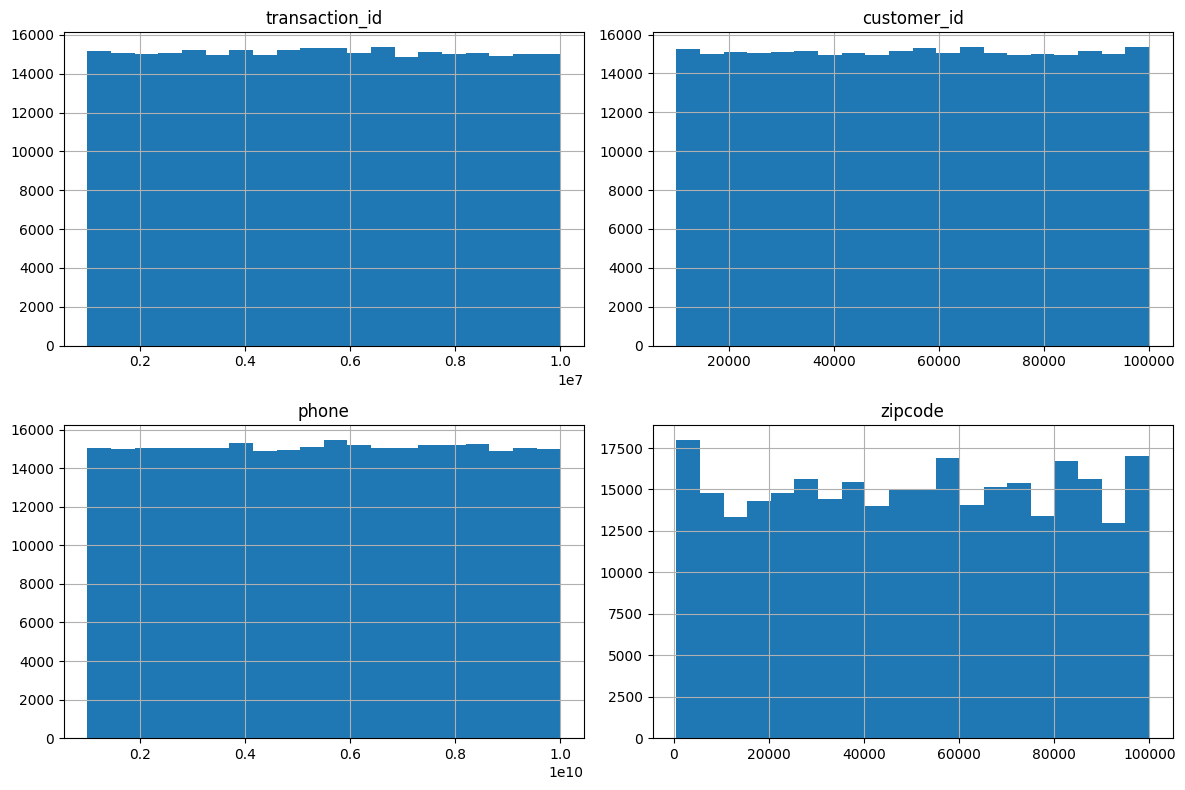

In [20]:
# Histogramas para métricas de ventas
# Identificar columnas de ventas
columnas_ventas = [col for col in df_limpio.columns if any(word in col.lower() for word in ['sales', 'ventas', 'global', 'na_', 'eu_', 'jp_'])]

if len(columnas_ventas) >= 4:
    # Hacer histogramas simples
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    df_limpio[columnas_ventas[0]].hist(bins=20)
    plt.title(columnas_ventas[0])

    plt.subplot(2, 2, 2)
    df_limpio[columnas_ventas[1]].hist(bins=20)
    plt.title(columnas_ventas[1])

    plt.subplot(2, 2, 3)
    df_limpio[columnas_ventas[2]].hist(bins=20)
    plt.title(columnas_ventas[2])

    plt.subplot(2, 2, 4)
    df_limpio[columnas_ventas[3]].hist(bins=20)
    plt.title(columnas_ventas[3])

    plt.tight_layout()
    plt.show()
elif len(columnas_numericas) >= 4:
    # Si no hay columnas de ventas, usar columnas numéricas
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    df_limpio[columnas_numericas[0]].hist(bins=20)
    plt.title(columnas_numericas[0])

    plt.subplot(2, 2, 2)
    df_limpio[columnas_numericas[1]].hist(bins=20)
    plt.title(columnas_numericas[1])

    plt.subplot(2, 2, 3)
    df_limpio[columnas_numericas[2]].hist(bins=20)
    plt.title(columnas_numericas[2])

    plt.subplot(2, 2, 4)
    df_limpio[columnas_numericas[3]].hist(bins=20)
    plt.title(columnas_numericas[3])

    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes columnas numéricas para crear histogramas")

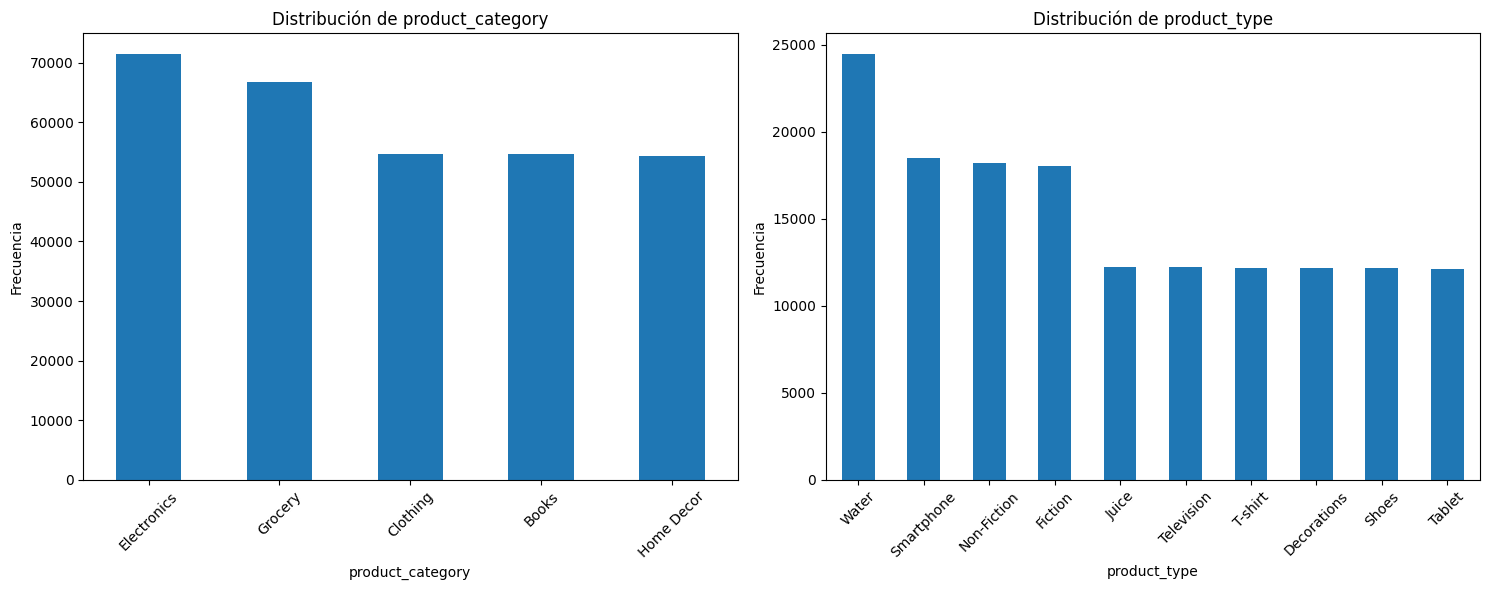

In [21]:
# Gráficos de barras para categorías de productos
columnas_categoria = [col for col in df_limpio.columns if any(word in col.lower() for word in ['genre', 'category', 'type', 'platform'])]

if len(columnas_categoria) > 0:
    n_cols = min(2, len(columnas_categoria))
    n_rows = (len(columnas_categoria) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_categoria):
        if i < len(axes):
            # Mostrar solo las 10 categorías más frecuentes
            top_categories = df_limpio[col].value_counts().head(10)
            top_categories.plot(kind='bar', ax=axes[i], rot=45)
            axes[i].set_title(f'Distribución de {col}')
            axes[i].set_xlabel(col)
            axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes vacíos
    for i in range(len(columnas_categoria), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas de categoría para graficar")

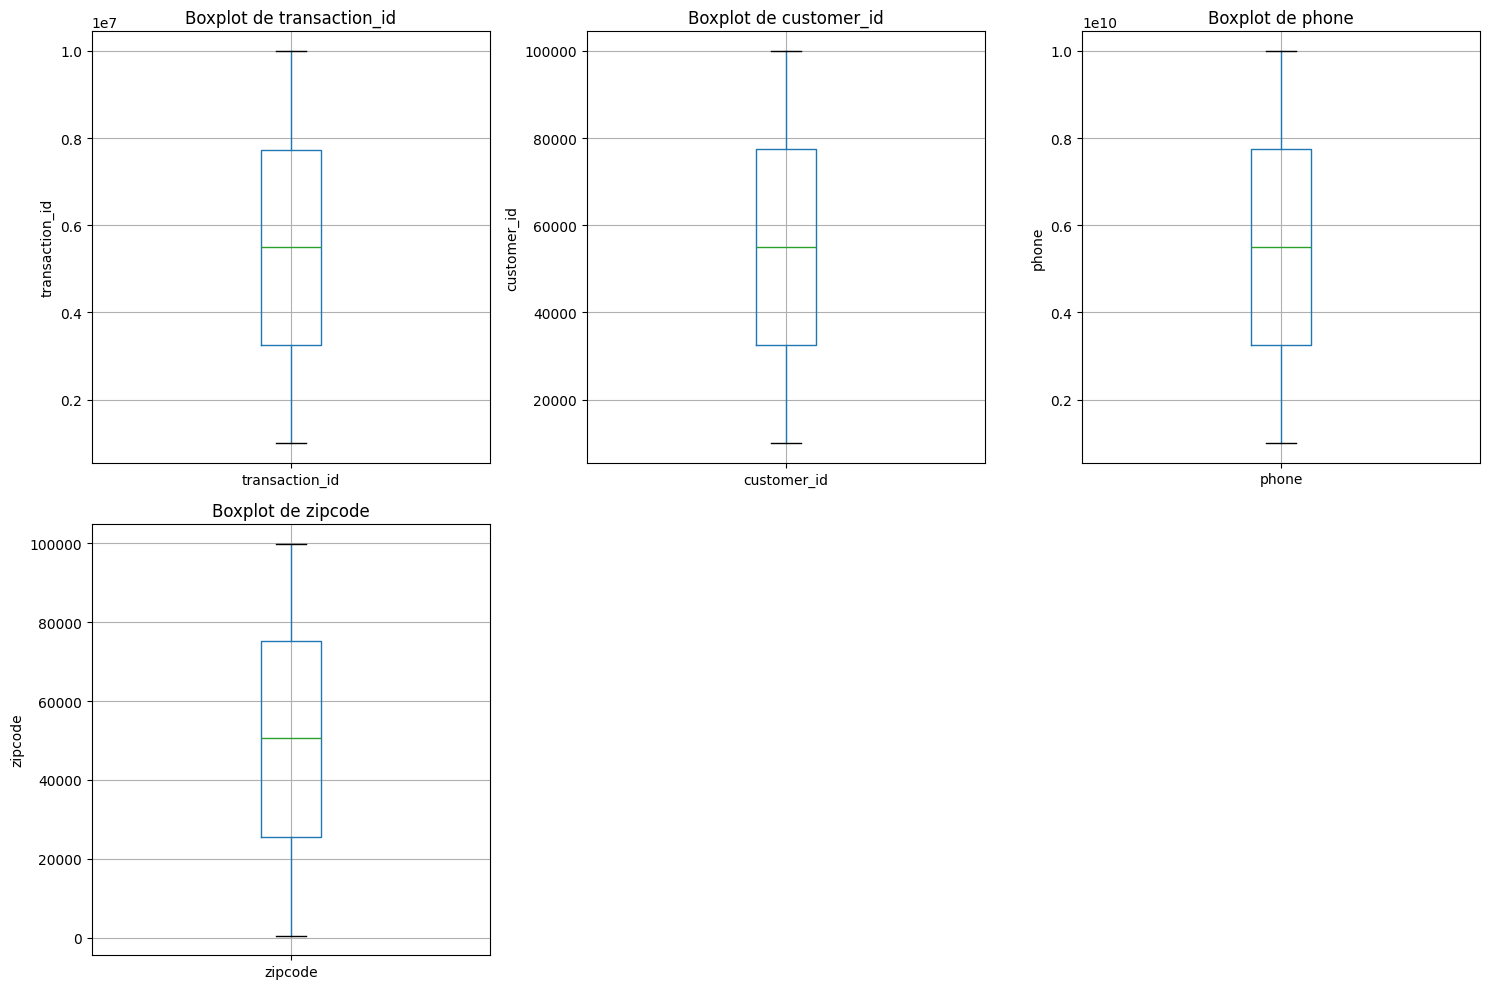

In [22]:
# Boxplots para detectar outliers en métricas de ventas
columnas_para_boxplot = columnas_ventas if len(columnas_ventas) > 0 else list(columnas_numericas)
columnas_disponibles = columnas_para_boxplot[:4]  # Tomar máximo 4

if len(columnas_disponibles) > 0:
    n_cols = min(3, len(columnas_disponibles))
    n_rows = (len(columnas_disponibles) + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    axes = axes.flatten() if n_rows > 1 or n_cols > 1 else [axes]

    for i, col in enumerate(columnas_disponibles):
        if i < len(axes):
            df_limpio.boxplot(column=col, ax=axes[i])
            axes[i].set_title(f'Boxplot de {col}')
            axes[i].set_ylabel(col)

    # Ocultar ejes vacíos
    for i in range(len(columnas_disponibles), len(axes)):
        axes[i].set_visible(False)

    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron métricas para boxplots")

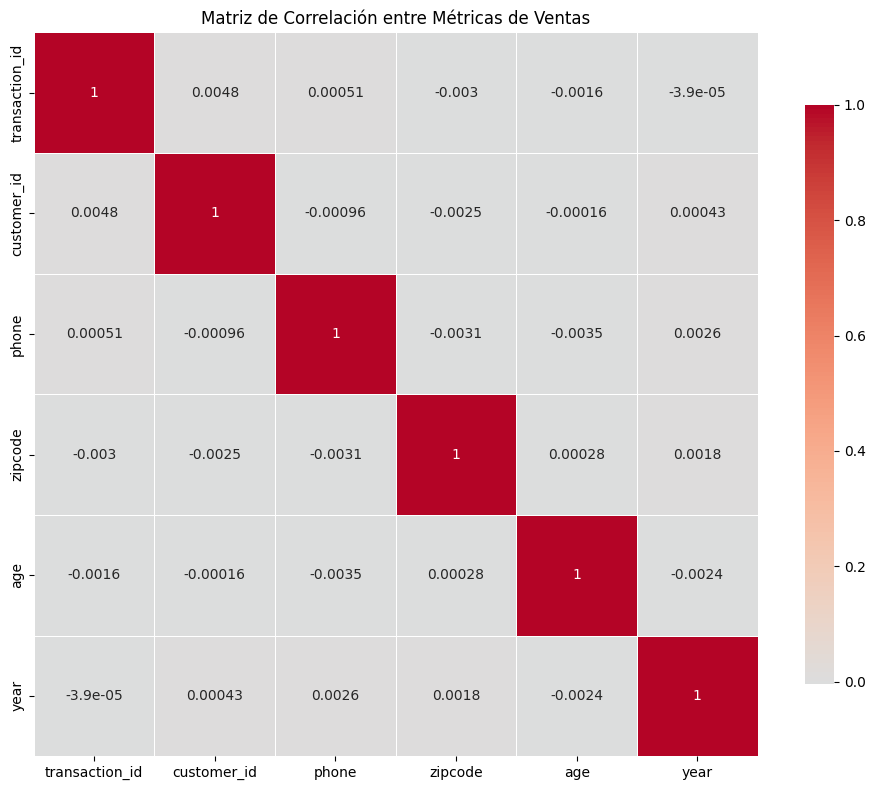

In [23]:
# Matriz de correlación entre métricas de ventas
columnas_para_corr = columnas_ventas if len(columnas_ventas) > 1 else list(columnas_numericas)
columnas_disponibles = columnas_para_corr[:6]  # Tomar máximo 6 para mejor visualización

if len(columnas_disponibles) > 1:
    plt.figure(figsize=(10, 8))
    matriz_corr = df_limpio[columnas_disponibles].corr()
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matriz de Correlación entre Métricas de Ventas')
    plt.tight_layout()
    plt.show()
else:
    print("Se necesitan al menos 2 variables numéricas para la matriz de correlación")

In [24]:
# Análisis de columnas numéricas principales
print("Analizando columnas numéricas del dataset...")

# Mostrar las primeras 5 columnas numéricas
if len(columnas_numericas) > 0:
    print(f"\nColumnas numéricas encontradas: {list(columnas_numericas)[:5]}")

    # Mostrar estadísticas básicas
    print("\nEstadísticas básicas de las primeras columnas numéricas:")
    for col in list(columnas_numericas)[:3]:
        print(f"\n{col}:")
        print(f"  - Mínimo: {df_limpio[col].min():.2f}")
        print(f"  - Máximo: {df_limpio[col].max():.2f}")
        print(f"  - Promedio: {df_limpio[col].mean():.2f}")
else:
    print("No se encontraron columnas numéricas en el dataset")

Analizando columnas numéricas del dataset...

Columnas numéricas encontradas: ['transaction_id', 'customer_id', 'phone', 'zipcode', 'age']

Estadísticas básicas de las primeras columnas numéricas:

transaction_id:
  - Mínimo: 1000007.00
  - Máximo: 9999995.00
  - Promedio: 5495822.63

customer_id:
  - Mínimo: 10000.00
  - Máximo: 99999.00
  - Promedio: 55006.55

phone:
  - Mínimo: 1000049414.00
  - Máximo: 9999996122.00
  - Promedio: 5501464142.75


## 12. Análisis de Productos Top

In [25]:
# Análisis de variables categóricas principales
print("Analizando variables categóricas...")

if len(columnas_categoricas) > 0:
    print(f"\nTotal de columnas categóricas: {len(columnas_categoricas)}")

    # Mostrar información de las primeras 3 columnas categóricas
    for col in list(columnas_categoricas)[:3]:
        num_valores = df_limpio[col].nunique()
        print(f"\n{col}:")
        print(f"  - Valores únicos: {num_valores}")

        # Si tiene pocos valores, mostrar la distribución
        if num_valores <= 10:
            print("  - Distribución:")
            for valor, cuenta in df_limpio[col].value_counts().head(5).items():
                print(f"    • {valor}: {cuenta}")
        else:
            # Si tiene muchos valores, mostrar los top 5
            print("  - Top 5 valores más frecuentes:")
            for valor, cuenta in df_limpio[col].value_counts().head(5).items():
                print(f"    • {valor}: {cuenta}")
else:
    print("\nNo se encontraron columnas categóricas en el dataset")

Analizando variables categóricas...

Total de columnas categóricas: 20

name:
  - Valores únicos: 159390
  - Top 5 valores más frecuentes:
    • Michael Smith: 526
    • Michael Johnson: 111
    • Michael Jones: 102
    • Christopher Smith: 93
    • Michael Williams: 91

email:
  - Valores únicos: 52897
  - Top 5 valores más frecuentes:
    • Michael59@gmail.com: 440
    • Michael95@gmail.com: 92
    • Michael17@gmail.com: 90
    • Michael39@gmail.com: 87
    • Michael58@gmail.com: 84

address:
  - Valores únicos: 299329
  - Top 5 valores más frecuentes:
    • 0008 Raymond Club Suite 857: 317
    • 467 Gill Dale Suite 406: 2
    • 07488 Yang Mills Apt. 525: 2
    • 6000 Gomez Radial: 2
    • 7261 Walters Oval Apt. 778: 2


In [26]:
# Análisis de Outliers
print("Análisis de Outliers en columnas numéricas:")

def detectar_outliers_iqr(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    return outliers, limite_inferior, limite_superior

# Analizar outliers para las primeras columnas numéricas
if len(columnas_numericas) > 0:
    # Analizar máximo 5 columnas numéricas
    for col in list(columnas_numericas)[:5]:
        outliers, lim_inf, lim_sup = detectar_outliers_iqr(df_limpio, col)
        porcentaje_outliers = (len(outliers) / len(df_limpio)) * 100

        print(f"\n{col}:")
        print(f"  - Outliers encontrados: {len(outliers)} ({porcentaje_outliers:.2f}%)")
        print(f"  - Límites IQR: [{lim_inf:.2f}, {lim_sup:.2f}]")
        print(f"  - Rango real: [{df_limpio[col].min():.2f}, {df_limpio[col].max():.2f}]")
else:
    print("\nNo hay columnas numéricas para analizar outliers")

Análisis de Outliers en columnas numéricas:

transaction_id:
  - Outliers encontrados: 0 (0.00%)
  - Límites IQR: [-3479751.50, 14467646.50]
  - Rango real: [1000007.00, 9999995.00]

customer_id:
  - Outliers encontrados: 0 (0.00%)
  - Límites IQR: [-35008.50, 144987.50]
  - Rango real: [10000.00, 99999.00]

phone:
  - Outliers encontrados: 0 (0.00%)
  - Límites IQR: [-3477968479.12, 14482710987.88]
  - Rango real: [1000049414.00, 9999996122.00]

zipcode:
  - Outliers encontrados: 0 (0.00%)
  - Límites IQR: [-49178.50, 149847.50]
  - Rango real: [501.00, 99949.00]

age:
  - Outliers encontrados: 0 (0.00%)
  - Límites IQR: [-14.00, 82.00]
  - Rango real: [18.00, 70.00]


In [27]:
# Resumen general del dataset
print("=== RESUMEN GENERAL DEL DATASET ===")

print(f"\n1. INFORMACIÓN BÁSICA:")
print(f"   - Total de filas: {len(df_limpio):,}")
print(f"   - Total de columnas: {len(df_limpio.columns)}")
print(f"   - Columnas numéricas: {len(columnas_numericas)}")
print(f"   - Columnas categóricas: {len(columnas_categoricas)}")

print(f"\n2. COLUMNAS DEL DATASET:")
if len(columnas_numericas) > 0:
    print(f"   - Numéricas: {list(columnas_numericas)[:5]}")
if len(columnas_categoricas) > 0:
    print(f"   - Categóricas: {list(columnas_categoricas)[:5]}")

print(f"\n3. VALORES NULOS:")
total_nulos = df_limpio.isnull().sum().sum()
print(f"   - Total de valores nulos: {total_nulos}")
print(f"   - Porcentaje de datos completos: {((len(df_limpio) * len(df_limpio.columns) - total_nulos) / (len(df_limpio) * len(df_limpio.columns)) * 100):.2f}%")

=== RESUMEN GENERAL DEL DATASET ===

1. INFORMACIÓN BÁSICA:
   - Total de filas: 302,010
   - Total de columnas: 30
   - Columnas numéricas: 10
   - Columnas categóricas: 20

2. COLUMNAS DEL DATASET:
   - Numéricas: ['transaction_id', 'customer_id', 'phone', 'zipcode', 'age']
   - Categóricas: ['name', 'email', 'address', 'city', 'state']

3. VALORES NULOS:
   - Total de valores nulos: 0
   - Porcentaje de datos completos: 100.00%


In [28]:
# Buscar columnas de año o tiempo
columnas_tiempo = [col for col in df_limpio.columns if any(word in col.lower() for word in ['year', 'año', 'date', 'fecha'])]

if columnas_tiempo:
    col_tiempo = columnas_tiempo[0]
    print(f"Columna de tiempo encontrada: {col_tiempo}")

    # Distribución por año
    print(f"\nDistribución por {col_tiempo}:")
    print(df_limpio[col_tiempo].value_counts().sort_index().head(10))

    # Análisis temporal de ventas si existe
    if len(columnas_ventas) > 0:
        col_ventas = columnas_ventas[0]
        ventas_por_tiempo = df_limpio.groupby(col_tiempo)[col_ventas].sum().sort_index()
        print(f"\nVentas por {col_tiempo} (primeros 10):")
        print(ventas_por_tiempo.head(10))
else:
    print("No se encontró columna de tiempo")
    print("\nColumnas disponibles en el dataset:")
    print(df_limpio.columns.tolist())

Columna de tiempo encontrada: date

Distribución por date:
date
01-01-24    831
01-02-24    832
01-03-24    860
01-04-24    837
01-05-24    840
01-06-24    822
01-07-24    782
01-08-24    817
01-09-24    847
01-10-24    859
Name: count, dtype: int64


## 16. Top 10 Productos más Exitosos

In [29]:
# Matriz de correlación
print("Correlaciones entre variables numéricas:")

if len(columnas_numericas) > 1:
    matriz_corr = df_limpio[columnas_numericas].corr()
    print(matriz_corr)
else:
    print("No hay suficientes columnas numéricas")

Correlaciones entre variables numéricas:
                 transaction_id  customer_id     phone   zipcode       age  \
transaction_id         1.000000     0.004793  0.000515 -0.002961 -0.001629   
customer_id            0.004793     1.000000 -0.000965 -0.002475 -0.000162   
phone                  0.000515    -0.000965  1.000000 -0.003072 -0.003495   
zipcode               -0.002961    -0.002475 -0.003072  1.000000  0.000277   
age                   -0.001629    -0.000162 -0.003495  0.000277  1.000000   
year                  -0.000039     0.000434  0.002553  0.001807 -0.002388   
total_purchases       -0.001716     0.003737 -0.000568  0.001291  0.033292   
amount                -0.003015     0.000341  0.000165  0.001399  0.000845   
total_amount          -0.002466     0.002841 -0.000161  0.001405  0.022518   
ratings               -0.000317     0.001834 -0.000908 -0.002058  0.166914   

                     year  total_purchases    amount  total_amount   ratings  
transaction_id  -0.00

## 17. Resumen de Hallazgos

In [30]:
# Identificar los registros con valores más altos
print("=== TOP 10 REGISTROS ===")

# Buscar si existe alguna columna numérica para ordenar
if len(columnas_numericas) > 0:
    # Si hay columnas de ventas, usar la primera
    if len(columnas_ventas) > 0:
        columna_ordenar = columnas_ventas[0]
    else:
        # Usar la primera columna numérica disponible
        columna_ordenar = columnas_numericas[0]

    # Obtener top 10
    top_10 = df_limpio.nlargest(10, columna_ordenar)
    print(f"Top 10 registros por '{columna_ordenar}':")
    print(top_10)
else:
    print("No hay columnas numéricas para ordenar")
    print("Mostrando las primeras 10 filas:")
    print(df_limpio.head(10))

=== TOP 10 REGISTROS ===
Top 10 registros por 'transaction_id':
        transaction_id  customer_id               name  \
22256        9999995.0      46970.0      Lauren Austin   
295006       9999945.0      28759.0         John Smith   
19132        9999922.0      95049.0        David Riley   
224491       9999909.0      36575.0  Benjamin Petersen   
129038       9999823.0      27098.0         Andre Hood   
35789        9999786.0      57352.0       Corey Knight   
35125        9999785.0      36569.0       Daniel Davis   
51171        9999782.0      83989.0        Johnny Shaw   
224596       9999775.0      24558.0   Michael Matthews   
142560       9999647.0      44084.0     Steven Gregory   

                          email         phone                         address  \
22256     Mackenzie67@gmail.com  5.017934e+09               08547 John Courts   
295006      Melissa96@gmail.com  5.558791e+09                 414 Huang Plaza   
19132   Christopher73@gmail.com  2.404222e+09   9433 C

## 18. Identificación de Problemática a Abordar

In [31]:
# Verificar qué columnas tenemos para sugerir problemas específicos
tiene_categoricas = len(columnas_categoricas) > 0
tiene_numericas = len(columnas_numericas) > 0

if tiene_categoricas and tiene_numericas:
    print("\n1. CLASIFICACIÓN:")
    print("   - Predecir una variable categórica usando las numéricas")
    print(f"   - Variables categóricas disponibles: {list(columnas_categoricas)[:3]}")
    print(f"   - Variables numéricas disponibles: {list(columnas_numericas)[:3]}")

if tiene_numericas and len(columnas_numericas) > 1:
    print("\n2. REGRESIÓN:")
    print("   - Predecir una variable numérica usando las demás")
    if len(columnas_ventas) > 0:
        print(f"   - Posibles variables objetivo: {columnas_ventas[:3]}")
    else:
        print(f"   - Posibles variables objetivo: {list(columnas_numericas)[:3]}")

if tiene_numericas and len(columnas_numericas) > 3:
    print("\n3. CLUSTERING:")
    print("   - Agrupar registros similares")
    print("   - No requiere variable objetivo")
    print(f"   - Usar las {len(columnas_numericas)} variables numéricas disponibles")

print("\nRECOMENDACIÓN BASADA EN TUS DATOS:")
if len(columnas_ventas) > 0:
    print("   - REGRESIÓN: Tienes datos de ventas, ideal para predecir rendimiento")
elif len(columnas_numericas) > 5:
    print("   - CLUSTERING: Tienes muchas variables numéricas, ideal para encontrar grupos")
elif tiene_categoricas and tiene_numericas:
    print("   - CLASIFICACIÓN: Tienes variables categóricas que puedes predecir")
else:
    print("   - Necesitas más análisis para determinar el mejor enfoque")


1. CLASIFICACIÓN:
   - Predecir una variable categórica usando las numéricas
   - Variables categóricas disponibles: ['name', 'email', 'address']
   - Variables numéricas disponibles: ['transaction_id', 'customer_id', 'phone']

2. REGRESIÓN:
   - Predecir una variable numérica usando las demás
   - Posibles variables objetivo: ['transaction_id', 'customer_id', 'phone']

3. CLUSTERING:
   - Agrupar registros similares
   - No requiere variable objetivo
   - Usar las 10 variables numéricas disponibles

RECOMENDACIÓN BASADA EN TUS DATOS:
   - CLUSTERING: Tienes muchas variables numéricas, ideal para encontrar grupos
